## Clustering de Películas

In [1]:
import numpy as np
import pandas as pd

import nltk
import re
import os

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alexander\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Carga de datasets

In [3]:
titulos = open('Data1/title_list.txt').read().split('\n')
titulos = titulos[:100]
titulos[:5]

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca']

In [4]:
sinopsis_wiki = open('Data1/synopses_list_wiki.txt', encoding="utf8").read().split('\n BREAKS HERE')
sinopsis_wiki = sinopsis_wiki[:100]
sinopsis_wiki[0][:1000]

" Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito's godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter's wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito's youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito's godson   John

In [5]:
sinopsis_imdb = open('Data1/synopses_list_imdb.txt', encoding="utf8").read().split('\n BREAKS HERE')
sinopsis_imdb = sinopsis_imdb[:100]
sinopsis_imdb[0][:1000]

'\n\nIn late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone\'s daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known to friends and associates as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors because, according to Italian tradition, "no Sicilian can refuse a request on his daughter\'s wedding day." One of the men who asks the Don for a favor is Amerigo Bonasera, a successful mortician and acquaintance of the Don, whose daughter was brutally beaten by two young men because she refused their advances; the men received minimal punishment. The Don is disappointed in Bonasera, who\'d avoided most contact with the Don due to Corleone\'s nefarious business dealings. The Don\'s wife is godmother to Bonasera\'s shamed daughter, a relationship the Don uses to extract new loyalty from the undertaker. The Don agrees to have his 

In [6]:
len(titulos)

100

In [7]:
len(sinopsis_wiki)

100

In [8]:
len(sinopsis_imdb)

100

In [9]:
sinopsis_totales = [wiki + imdb for wiki, imdb in zip(sinopsis_wiki, sinopsis_imdb)]

In [12]:
sinopsis_totales

[' Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson

In [11]:
len(sinopsis_totales)

100

## Palabras más comunes

In [14]:
from nltk import word_tokenize, FreqDist

In [15]:
cadena = 'este es un curso de la especialización de Python'

In [16]:
word_tokenize(cadena)

['este', 'es', 'un', 'curso', 'de', 'la', 'especialización', 'de', 'Python']

para las sinopsis

In [17]:
texto_total= ' '.join(sinopsis_totales)

In [18]:
total_tokens = word_tokenize(texto_total)

In [19]:
texto_total[:500]

" Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito's godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasi"

In [23]:
total_tokens[:100]

['Plot',
 '[',
 'edit',
 ']',
 '[',
 '[',
 'edit',
 'edit',
 ']',
 ']',
 'On',
 'the',
 'day',
 'of',
 'his',
 'only',
 'daughter',
 "'s",
 'wedding',
 ',',
 'Vito',
 'Corleone',
 'hears',
 'requests',
 'in',
 'his',
 'role',
 'as',
 'the',
 'Godfather',
 ',',
 'the',
 'Don',
 'of',
 'a',
 'New',
 'York',
 'crime',
 'family',
 '.',
 'Vito',
 "'s",
 'youngest',
 'son',
 ',',
 'Michael',
 ',',
 'in',
 'a',
 'Marine',
 'Corps',
 'uniform',
 ',',
 'introduces',
 'his',
 'girlfriend',
 ',',
 'Kay',
 'Adams',
 ',',
 'to',
 'his',
 'family',
 'at',
 'the',
 'sprawling',
 'reception',
 '.',
 'Vito',
 "'s",
 'godson',
 'Johnny',
 'Fontane',
 ',',
 'a',
 'popular',
 'singer',
 ',',
 'pleads',
 'for',
 'help',
 'in',
 'securing',
 'a',
 'coveted',
 'movie',
 'role',
 ',',
 'so',
 'Vito',
 'dispatches',
 'his',
 'consigliere',
 ',',
 'Tom',
 'Hagen',
 ',',
 'to',
 'Los',
 'Angeles']

In [24]:
freq = FreqDist(total_tokens)

In [26]:
freq.most_common(100)

[(',', 19132),
 ('the', 17345),
 ('.', 14121),
 ('to', 10936),
 ('and', 10331),
 ('a', 7445),
 ('of', 5771),
 ('his', 4788),
 ('in', 4591),
 ('is', 4481),
 ('he', 4029),
 ("'s", 3805),
 ('that', 3765),
 ('with', 2795),
 ('her', 2739),
 ('him', 2672),
 ('for', 2250),
 (')', 2221),
 ('(', 2217),
 ('on', 1801),
 ('``', 1779),
 ('by', 1761),
 ('as', 1740),
 ('at', 1681),
 ('but', 1598),
 ("''", 1586),
 ('The', 1505),
 ('she', 1392),
 ('from', 1339),
 ('they', 1337),
 ('has', 1285),
 ('who', 1280),
 ('an', 1276),
 ('He', 1116),
 ('it', 1115),
 ('out', 1064),
 ('their', 1045),
 ('are', 992),
 ('be', 857),
 ('into', 853),
 ('up', 849),
 ('not', 799),
 ('them', 713),
 ('about', 705),
 ('was', 687),
 ('tells', 684),
 ('have', 657),
 ('when', 617),
 ('[', 586),
 (']', 586),
 ('will', 586),
 ('then', 568),
 ('When', 547),
 ('after', 544),
 ('man', 529),
 ('back', 521),
 ('which', 506),
 ('where', 494),
 ('one', 493),
 (';', 479),
 ('can', 457),
 ('off', 455),
 ('while', 448),
 ('had', 438),
 ('be

## Preprocesamiento

En esta sección se eliminan las palabras más comunes que no aportan mayor valor al texto de sinopsis de cada película. Para esto usamos la librería ``nltk`` y la funcion ``stopwods``

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alexander\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [30]:
len(stopwords)

179

In [31]:
stopwords2 = nltk.corpus.stopwords.words('spanish')
stopwords2[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [32]:
len(stopwords2)

313

funciones de cadenas

In [35]:
cadena = 'Hola,   este es el curso de la Especialización en Python, estamos en el año 2023'

In [36]:
tokens = word_tokenize(cadena)
tokens

['Hola',
 ',',
 'este',
 'es',
 'el',
 'curso',
 'de',
 'la',
 'Especialización',
 'en',
 'Python',
 ',',
 'estamos',
 'en',
 'el',
 'año',
 '2023']

In [37]:
[token for token in tokens if token.isalpha()]

['Hola',
 'este',
 'es',
 'el',
 'curso',
 'de',
 'la',
 'Especialización',
 'en',
 'Python',
 'estamos',
 'en',
 'el',
 'año']

In [40]:
def tokenizar(texto):
    
    #tokenizamos el texto en minúsculas
    tokens = nltk.word_tokenize(texto.lower())
    
    #solo nos quedamos con los tokens que contengan letras y no sean stopwords
    filtro_tokens = [token for token in tokens if token.isalpha()] #Elimino com y puntos 
    filtro_tokens = [token for token in filtro_tokens if token not in stopwords] #elimino stopwords
    
    return filtro_tokens

In [42]:
tokenizar("On the 12345 day  of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather")

['day',
 'daughter',
 'wedding',
 'vito',
 'corleone',
 'hears',
 'requests',
 'role',
 'godfather']

In [43]:
from nltk.stem import SnowballStemmer

In [44]:
stemmer = SnowballStemmer('english')

In [45]:
def stemming(lista_tokens):
    stems = [stemmer.stem(token) for token in lista_tokens] 
    return stems

In [46]:
tokens = tokenizar("On the 12345 day  of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather")

In [47]:
stemming(tokens)

['day',
 'daughter',
 'wed',
 'vito',
 'corleon',
 'hear',
 'request',
 'role',
 'godfath']

In [50]:
def tokenizar_y_stemming(texto):
    
    tokens = tokenizar(texto)
    tokens_stemmed = stemming(tokens)
     
    return tokens_stemmed

In [51]:
tokenizar_y_stemming("On the 12345 day  of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather")

['day',
 'daughter',
 'wed',
 'vito',
 'corleon',
 'hear',
 'request',
 'role',
 'godfath']

## Worclouds

Utilizamos la primera película (El padrino I)

In [54]:
titulos[:5]

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca']

In [55]:
tokens = tokenizar_y_stemming(sinopsis_totales[2])

In [56]:
FreqDist(tokens).most_common(20)

[('schindler', 72),
 ('jew', 26),
 ('factori', 22),
 ('nazi', 19),
 ('worker', 19),
 ('stern', 18),
 ('goeth', 17),
 ('german', 16),
 ('save', 16),
 ('war', 15),
 ('bribe', 14),
 ('camp', 14),
 ('ss', 13),
 ('jewish', 13),
 ('auschwitz', 12),
 ('ghetto', 11),
 ('peopl', 11),
 ('arriv', 10),
 ('armi', 10),
 ('schindlerjuden', 10)]

preprocesamos y guardamos la primera película

In [63]:
sinopsis_preprocesada = ' '.join(tokens)
sinopsis_preprocesada[:1000]

'plot edit edit edit german move polish jew kraków ghetto world war ii begin oskar schindler ethnic german arriv citi hope make fortun member nazi parti schindler lavish bribe wehrmacht german arm forc ss offici acquir factori produc enamelwar help run busi schindler enlist aid itzhak stern local jewish offici contact black market jewish busi communiti stern help schindler arrang loan financ factori schindler maintain friend relat nazi enjoy wealth status herr direktor stern handl administr schindler hire jewish worker cost less stern ensur mani peopl possibl deem essenti german war effort save transport concentr camp kill german move polish jew polish jew kraków ghetto kraków ghetto world war ii world war ii begin oskar schindler oskar schindler ethnic german ethnic german arriv citi hope make fortun member nazi parti nazi parti schindler lavish bribe wehrmacht wehrmacht german arm forc ss ss offici acquir factori produc enamelwar enamelwar help run busi schindler enlist aid itzhak st

In [52]:
#!pip install wordcloud

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

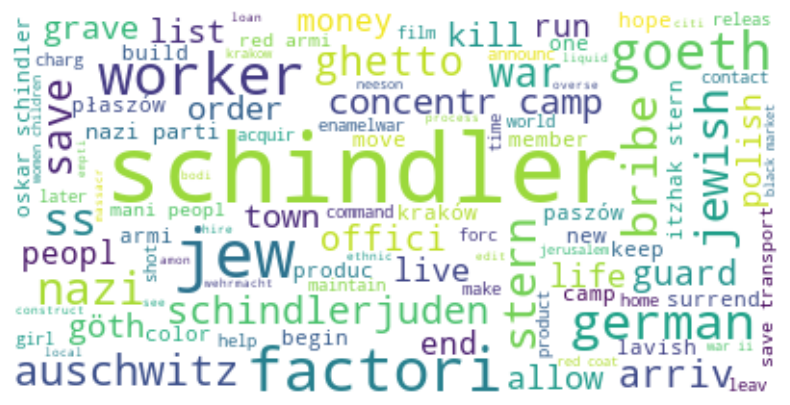

In [65]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white")
wordcloud = wordcloud.generate(sinopsis_preprocesada)

plt.figure(figsize = (30,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Vector de Características: TF-iDF

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

Parámetros:

``max_df``:máxima frecuencia utilizada. si el token aparece en más del 80% del documento probablemente no tenga mucho significado

``min_df``: cantidad mínima de documentos en los que debe aparecer el token para ser considerado. En este caso 0.2 es un porcentaje de documentos pero también se puede utilizar una cantidad absoluta (5, 10 documentos)


In [68]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df = 0.2, use_idf=True, tokenizer=tokenizar_y_stemming)

tfidf_matrix = tfidf_vectorizer.fit_transform(sinopsis_totales)
print(tfidf_matrix.shape)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(100, 590)


In [69]:
tfidf_matrix

<100x590 sparse matrix of type '<class 'numpy.float64'>'
	with 21330 stored elements in Compressed Sparse Row format>

In [71]:
terms = tfidf_vectorizer.get_feature_names_out()
len(terms)

590

In [72]:
terms[:10]

array(['abandon', 'abl', 'accept', 'accid', 'accompani', 'accus',
       'across', 'act', 'action', 'actual'], dtype=object)

In [74]:
len(titulos)

100

In [75]:
len(terms)

590

In [76]:
tfidf_matrix.shape

(100, 590)

In [79]:
matrix = pd.DataFrame(data = tfidf_matrix.toarray(), index = titulos, columns = terms)

In [80]:
matrix.head()

,abandon,abl,accept,accid,accompani,accus,across,act,action,actual,...,work,world,worri,would,wound,write,wrong,year,york,young
The Godfather,0.0,0.000000,0.087221,0.0,0.014352,0.06224,0.000000,0.035961,0.000000,0.000000,...,0.000000,0.012626,0.000000,0.027596,0.0,0.000000,0.0,0.080196,0.058303,0.040149
The Shawshank Redemption,0.0,0.023911,0.000000,0.0,0.000000,0.00000,0.000000,0.011199,0.013618,0.000000,...,0.097827,0.035389,0.030668,0.051566,0.0,0.058151,0.0,0.058276,0.000000,0.009378
Schindler's List,0.0,0.019274,0.000000,0.0,0.043233,0.00000,0.000000,0.000000,0.000000,0.043908,...,0.026285,0.133121,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
Raging Bull,0.0,0.000000,0.000000,0.0,0.021054,0.00000,0.018522,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.048154,0.000000,0.0,0.000000,0.0,0.065359,0.149677,0.000000
Casablanca,0.0,0.000000,0.000000,0.0,0.050846,0.00000,0.000000,0.000000,0.000000,0.025820,...,0.046369,0.044732,0.000000,0.048884,0.0,0.027563,0.0,0.015784,0.000000,0.000000


### Clustering jerárquico

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

In [82]:
dist = 1 - cosine_similarity(tfidf_matrix)

In [83]:
dist.shape

(100, 100)

In [86]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist)

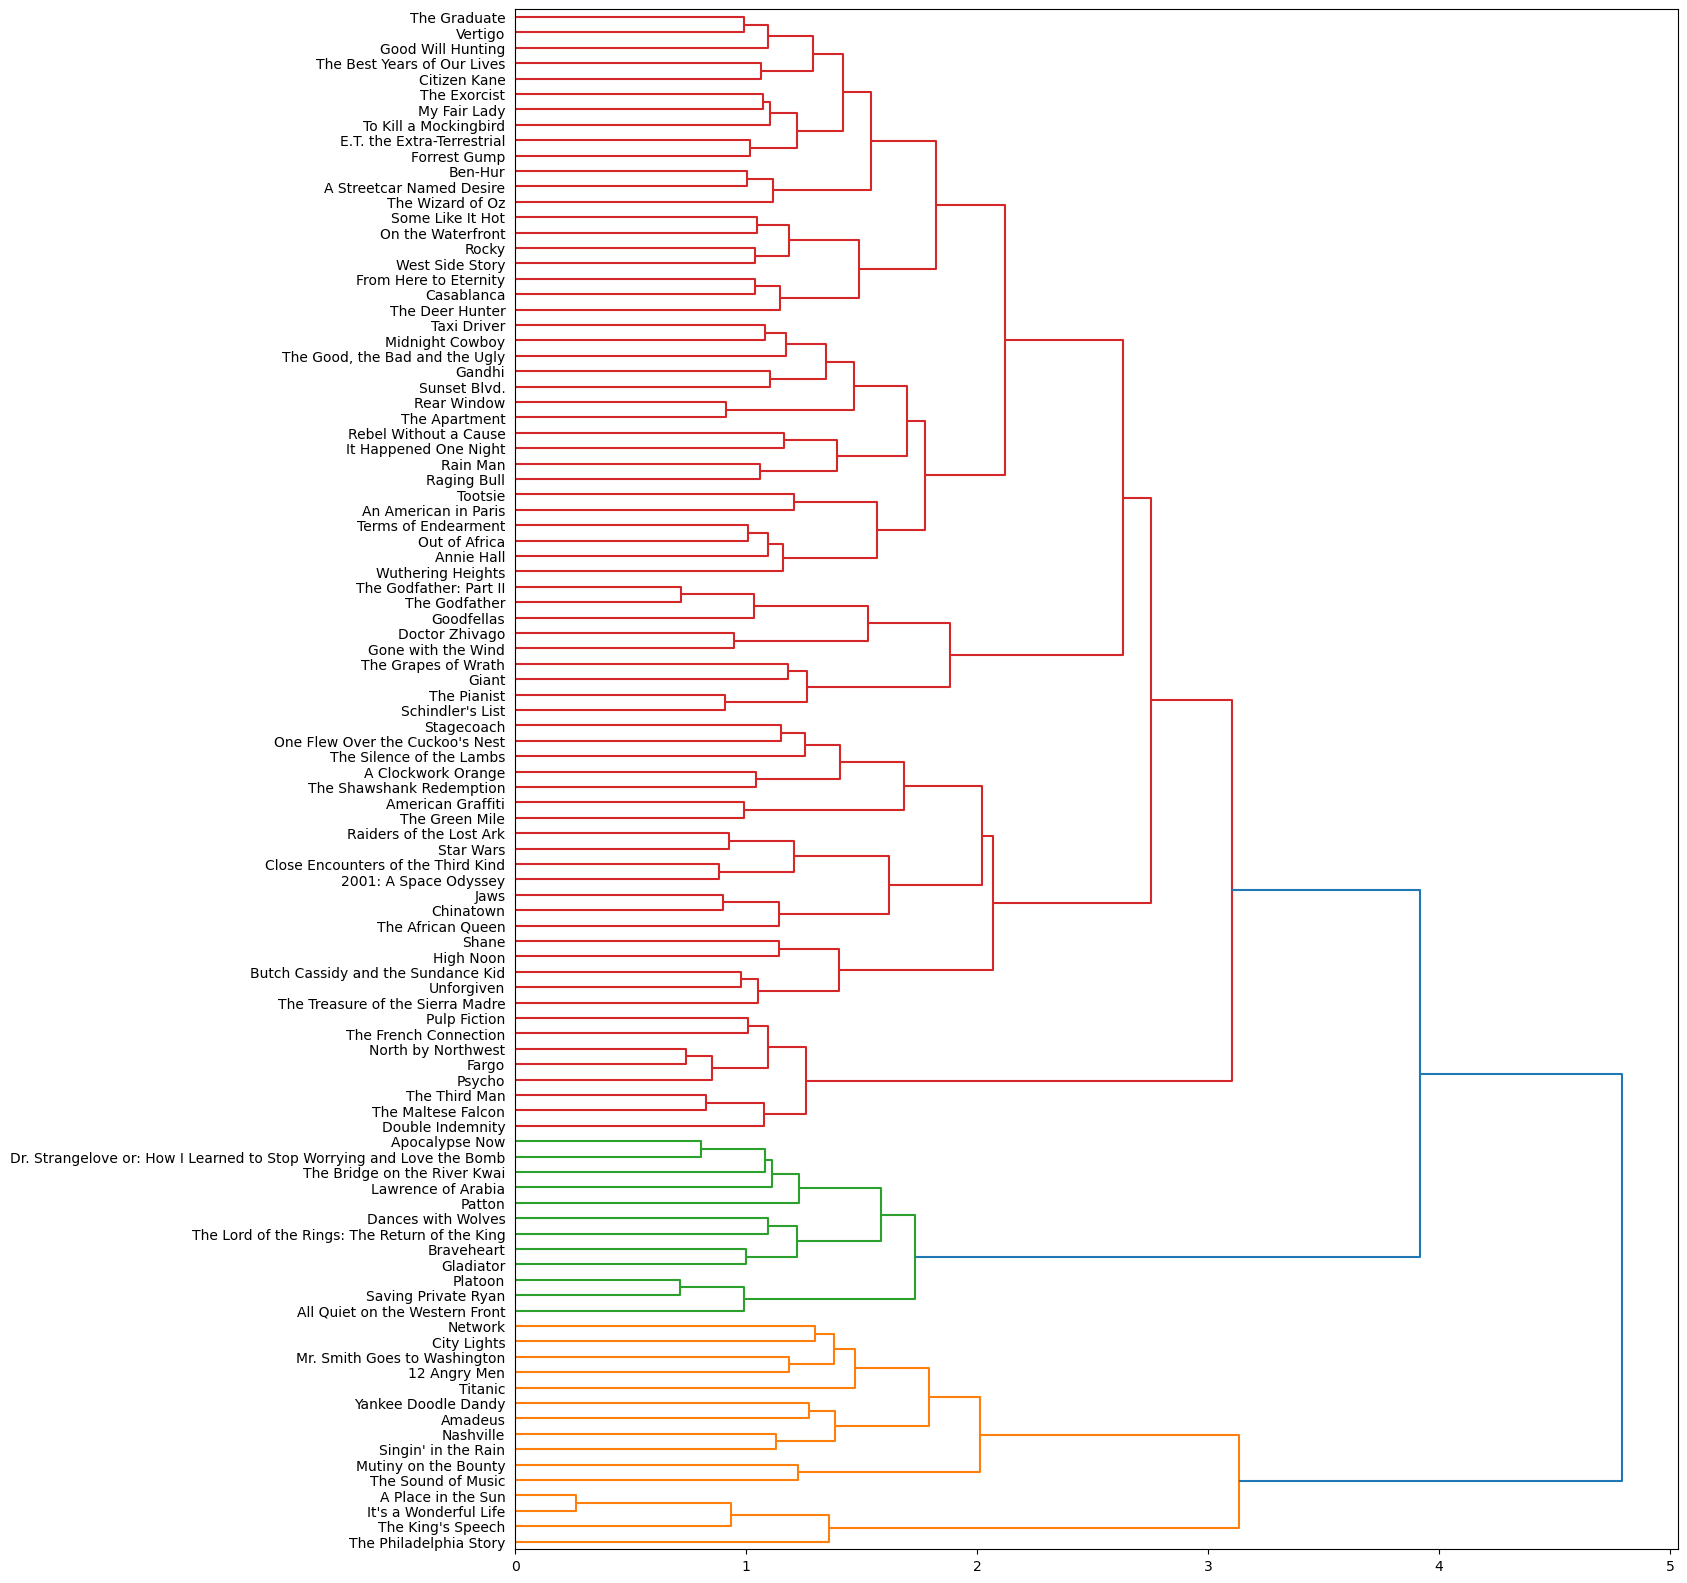

In [87]:
plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels=titulos, p = 500, leaf_font_size = 10)